In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:

# 1. Load Notebook 5 Summary

data_dir = Path("../data")
file = data_dir / "notebook5_store_impact_summary.csv"

if not file.exists():
    raise FileNotFoundError("Run Notebook 5 before Notebook 6.")

summary = pd.read_csv(file)
summary


,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,final_verdict,dominant_driver,insight
0,77,167,75.10,3.666667,0.020333,Trial Impact Confirmed,Customers,Store 77 showed a confirmed trial impact. Sale...
1,86,159,886.00,101.333333,0.216000,No Strong Evidence,Customers,Store 86 did not show strong statistical evide...
2,88,159,1372.85,123.333333,0.243333,Trial Impact Confirmed,Customers,Store 88 showed a confirmed trial impact. Sale...


In [3]:

# 2. Overall Trial Verdict

success_stores = summary[summary.final_verdict == "Trial Impact Confirmed"].trial_store.tolist()
failed_stores = summary[summary.final_verdict != "Trial Impact Confirmed"].trial_store.tolist()

overall_verdict = {
    "successful_trial_stores": success_stores,
    "unsuccessful_trial_stores": failed_stores,
    "n_successful": len(success_stores),
    "n_total": len(summary)
}

overall_verdict

{'successful_trial_stores': [77, 88],
 'unsuccessful_trial_stores': [86],
 'n_successful': 2,
 'n_total': 3}

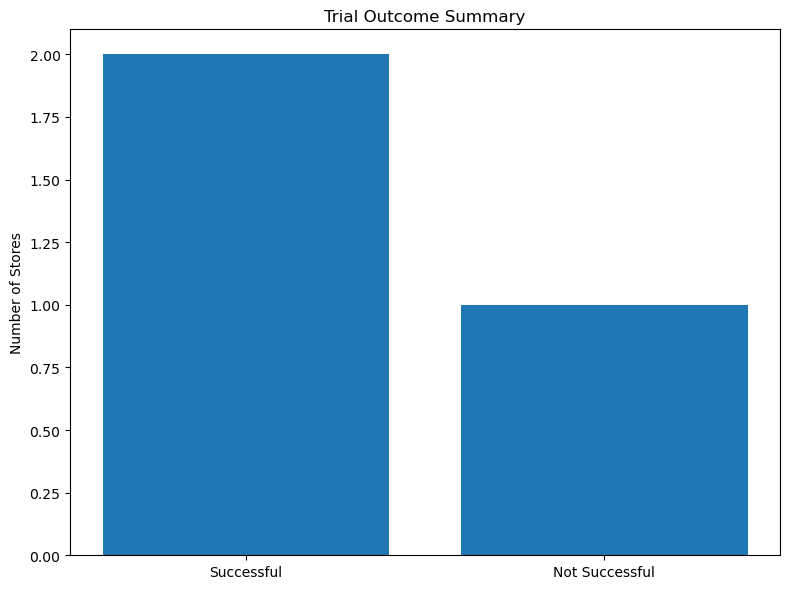

In [4]:
# 3. Visual Summary — Trial Outcomes

plt.figure(figsize=(8, 6))
outcome_labels = ["Successful", "Not Successful"]
outcome_counts = [len(success_stores), len(failed_stores)]
plt.bar(outcome_labels, outcome_counts)
plt.title("Trial Outcome Summary")
plt.ylabel("Number of Stores")
plt.tight_layout()
plt.show()


In [5]:
# 4. Executive Summary Generator

executive_summary = """
EXECUTIVE SUMMARY — Store Trial Evaluation
-----------------------------------------

This report evaluates the impact of the store trial conducted across selected trial locations. 
The objective was to determine whether the implemented trial strategy led to measurable and statistically significant improvements in store performance.

KEY FINDINGS:
- Total stores evaluated: {n_total}
- Stores with statistically confirmed trial impact: {n_successful}
- Stores without sufficient evidence of trial impact: {n_failed}

DETAILED OUTCOMES:
""".format(
    n_total=overall_verdict['n_total'],
    n_successful=overall_verdict['n_successful'],
    n_failed=len(failed_stores)
)

# Append store-level insights
for _, row in summary.iterrows():
    executive_summary += f"\nStore {row.trial_store} → {row.insight}"

executive_summary += """

CONCLUSION:
The trial demonstrates {strength} evidence of positive impact across selected stores. 
Further rollout decisions should consider store-specific drivers such as customer volume and transaction behavior.

""".format(
    strength="strong" if overall_verdict['n_successful'] > 0 else "limited"
)

print(executive_summary)


EXECUTIVE SUMMARY — Store Trial Evaluation
-----------------------------------------

This report evaluates the impact of the store trial conducted across selected trial locations. 
The objective was to determine whether the implemented trial strategy led to measurable and statistically significant improvements in store performance.

KEY FINDINGS:
- Total stores evaluated: 3
- Stores with statistically confirmed trial impact: 2
- Stores without sufficient evidence of trial impact: 1

DETAILED OUTCOMES:

Store 77 → Store 77 showed a confirmed trial impact. Sales increased by 75.10, mainly driven by higher customers.
Store 86 → Store 86 did not show strong statistical evidence of a trial impact. Sales difference was 886.00.
Store 88 → Store 88 showed a confirmed trial impact. Sales increased by 1372.85, mainly driven by higher customers.

CONCLUSION:
The trial demonstrates strong evidence of positive impact across selected stores. 
Further rollout decisions should consider store-specifi

In [6]:
# 5. Save Executive Summary

with open(data_dir / "notebook6_executive_summary.txt", "w") as f:
    f.write(executive_summary)

print("Executive summary saved.")


Executive summary saved.
